In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-base-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

base_df = pd.concat(all_dfs)


all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-Query_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct-ts/*.csv"):
# for fn in glob.glob("../eval-mmlu_oe-ct-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-Query-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct_embed/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "sBERT_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct_embed-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "sBERT-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct_embed_oai/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "OAIEmb_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct_embed_oai-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "OAIEmb-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)


for fn in glob.glob("results/eval-mmlu_oe-base-cross/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    if 'llama' in model_name:
        model_name = 'mistral_7b'
    else:
        model_name = 'llama2_7b'
    df["model_name"] = "Query-Cross_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct_probe-ts-cross/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    if 'llama' in model_name:
        model_name = 'mistral_7b'
    else:
        model_name = 'llama2_7b'
    df["model_name"] = "CT-Probe-Cross_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct-ts-cross/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    if 'llama' in model_name:
        model_name = 'mistral_7b'
    else:
        model_name = 'llama2_7b'
    df["model_name"] = "CT-Query-Cross_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

ct_df = pd.concat(all_dfs)


all_dfs = []

for fn in glob.glob("results/eval-mmlu_oe-lora_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-LoRA_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-lora_probe-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-LoRA-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

lora_probe_df = pd.concat(all_dfs)

all_dfs = []

for fn in glob.glob("results/eval-mmlu_oe-ct_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-Query-Probe_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct_probe-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-Query-Probe-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

ct_probe_df = pd.concat(all_dfs)

df = pd.read_csv("results/classifier_results.csv")
df["model_name"] = df["model_name"].apply(lambda x: "CT-Probe_" + x)
df["mode_tag"] = df["train_mode"] + " -> " + df["eval_mode"]

ts_df = pd.read_csv("results/classifier_ts_results.csv")
ts_df["model_name"] = ts_df["model_name"].apply(lambda x: "CT-Probe-TS_" + x)
ts_df["mode_tag"] = ts_df["train_mode"] + " -> " + ts_df["eval_mode"]

# df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
# df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

df = pd.concat([df, ts_df, base_df, ct_df, lora_probe_df, ct_probe_df])
df = df[df["mode_tag"] == "oe -> oe"]

df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

ve_df = pd.read_csv("results/ve_results.csv")
ve_df = ve_df[ve_df["eval_mode"] == "oe"]
ve_df["model"] = ve_df["model_name"]
ve_df["style"] = ve_df["eval_method"].apply(lambda x: "VE " + x[2:].upper())

samp_df = pd.read_csv("results/sampling_results.csv")

samp_count_df = samp_df[[
    'dataset', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_ece_counting', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting',
    'split',
    'model'
]]
samp_count_df['style'] = "Samp. Counting"
samp_count_df['unc_auroc'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting']
samp_count_df['unc_ece'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_ece_counting']

samp_likeli_df = samp_df[[
    'dataset', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_ece_likelihood', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_auroc_likelihood',
    'split',
    'model'
]]
samp_likeli_df['style'] = "Samp. Likelihood"
samp_likeli_df['unc_auroc'] = samp_likeli_df['fuzzy_gpt-3\\\\.5-turbo-1106_auroc_likelihood']
samp_likeli_df['unc_ece'] = samp_likeli_df['fuzzy_gpt-3\\\\.5-turbo-1106_ece_likelihood']

df = pd.concat([df, ve_df, samp_count_df, samp_likeli_df])
df = df[df["split"] == "test"]

model_name_map = {
    "llama2_7b": "LLaMA-2\n7B",
    "llama2_7b_chat": "LLaMA-2\n7B Chat",
    "llama2_13b": "LLaMA-2\n13B",
    "llama2_13b_chat": "LLaMA-2\n13B Chat",
    "mistral_7b": "Mistral\n7B",
    "mistral_7b_instruct": "Mistral\n7B Instruct",
}

df["model"] = df["model"].apply(lambda x: model_name_map[x])

#aggregate by model name
oe_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()

oe_df["unc_ece"] = oe_df["unc_ece"].fillna(oe_df["fuzzy_gpt-3.5-turbo-1106_unc_ece"])
oe_df["unc_auroc"] = oe_df["unc_auroc"].fillna(oe_df["fuzzy_gpt-3.5-turbo-1106_unc_auroc"])
oe_df["unc_acc"] = oe_df["unc_acc"].fillna(oe_df["fuzzy_gpt-3.5-turbo-1106_unc_acc"])
oe_df["acc"] = oe_df["acc"].fillna(oe_df["fuzzy_gpt-3.5-turbo-1106_acc"])

/tmp/ipykernel_3736802/3505687003.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_count_df['style'] = "Samp. Counting"
/tmp/ipykernel_3736802/3505687003.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_count_df['unc_auroc'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting']
/tmp/ipykernel_3736802/3505687003.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [37]:
discr_df = pd.read_csv("../fresh_classifier_results.csv")
discr_df = discr_df[discr_df["split"] == "test"]

print(discr_df.columns)
discr_df["model"] = discr_df["model_name"].apply(lambda x: model_name_map[x])

discr_oe = discr_df[(discr_df["eval_mode"] == "oe") & (discr_df["train_mode"] == "oe")]

ve1s1g_df = discr_oe[discr_oe["eval_method"] == "ve1s1g"]
ve1s1g_df["style"] = "VE 1S1G"

ve2s1g_df = discr_oe[discr_oe["eval_method"] == "ve2s1g"]
ve2s1g_df["style"] = "VE 2S1G"

probe_df = discr_oe[discr_oe["eval_method"] == "classifier"]
probe_df["style"] = "CT-Probe"

discr_oe = pd.concat([
    ve1s1g_df,
    ve2s1g_df,
    probe_df,
    oe_df[oe_df["style"] == 'Logits'],
    oe_df[oe_df["style"] == 'Query'],
    oe_df[oe_df["style"] == 'CT-LoRA'],
    oe_df[oe_df["style"] == 'CT-Query'],
    oe_df[oe_df["style"] == 'sBERT'],
    oe_df[oe_df["style"] == 'OAIEmb'],
    # oe_df[oe_df["style"] == "Samp. Counting"],
    # oe_df[oe_df["style"] == "Samp. Likelihood"],
    oe_df[oe_df["style"] == "Query-Cross"],
    oe_df[oe_df["style"] == "CT-Probe-Cross"],
    oe_df[oe_df["style"] == "CT-Query-Cross"],
])

discr_oe = discr_oe.groupby(["dataset", "model", "style"]).mean().reset_index()

Index(['N', 'logits_ece', 'acc', 'unc_acc', 'unc_auroc', 'unc_ece', 'dataset',
       'split', 'ts', 'model_name', 'eval_method', 'eval_mode', 'train_mode'],
      dtype='object')


/tmp/ipykernel_3736802/3787939963.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve1s1g_df["style"] = "VE 1S1G"
/tmp/ipykernel_3736802/3787939963.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve2s1g_df["style"] = "VE 2S1G"
/tmp/ipykernel_3736802/3787939963.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

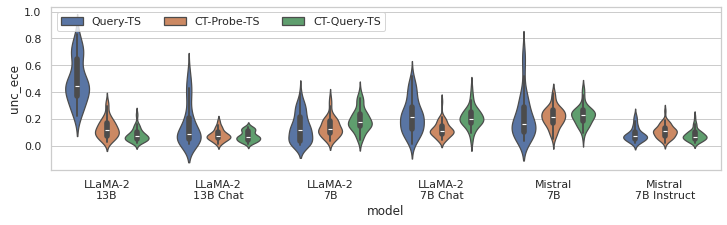

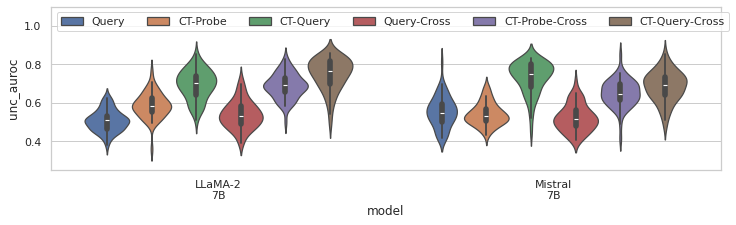

In [10]:
sns.set_theme(style="whitegrid")

# fig, ax = plt.subplots(figsize=(30, 3))
fig, ax = plt.subplots(figsize=(12, 3))

sns.violinplot(
    ax=ax,
    data=oe_df,#oe_df[(oe_df['model'] == 'LLaMA-2\n7B') | (oe_df['model'] == 'Mistral\n7B')],
    hue="style",
    # hue_order=["Query", "Query-TS", "CT-Probe","CT-Probe-TS", "CT-LoRA", "CT-LoRA-TS", "CT-Query", "CT-Query-TS", "CT-Query-Probe","CT-Query-Probe-TS","sBERT-TS","OAIEmb-TS"],
    # hue_order=["Query-TS", "CT-Probe-TS", "CT-LoRA-TS", "CT-Query-TS", "CT-Query-Probe-TS","sBERT-TS","OAIEmb-TS","Query-Cross","CT-Probe-Cross","CT-Query-Cross"],
    hue_order=["Query-TS", "CT-Probe-TS", "CT-Query-TS"],#,"Query-Cross","CT-Probe-Cross","CT-Query-Cross"],
    x="model",
    y="unc_ece",
    density_norm='count',
    gap=0.2,
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left', ncol=6)

plt.show()

fig, ax = plt.subplots(figsize=(12, 3))
# fig, ax = plt.subplots(figsize=(30, 3))

sns.violinplot(
    ax=ax,
    data=discr_oe[(discr_oe['model'] == 'LLaMA-2\n7B') | (discr_oe['model'] == 'Mistral\n7B')],
    hue="style",
    # hue_order= ["Query", "CT-Probe", "CT-LoRA", "CT-Query", "sBERT", "OAIEmb","Query-Cross","CT-Probe-Cross","CT-Query-Cross"],
    hue_order= ["Query", "CT-Probe", "CT-Query", "Query-Cross","CT-Probe-Cross","CT-Query-Cross"],
    # hue_order=["Query", "CT-Probe", "CT-LoRA", "CT-Query","VE 1S1G", "VE 2S1G", "Samp. Counting", "Samp. Likelihood"],
    x="model",
    y="unc_auroc",
    # hue_order=order,
)

ax.set_ylim((0.25, 1.1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left', ncol=6)

plt.show()

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

all_dfs = []
for fn in glob.glob("../results/eval-mmlu_choice-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("../results/eval-mmlu_choice-base-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

base_df = pd.concat(all_dfs)


all_dfs = []

for fn in glob.glob("../results/eval-mmlu_choice-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-Query_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("../results/eval-mmlu_choice-ct-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-Query-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-ct_embed/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "sBERT_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-ct_embed-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "sBERT-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-ct_embed_oai/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "OAIEmb_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-ct_embed_oai-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "OAIEmb-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)



ct_df = pd.concat(all_dfs)


all_dfs = []

for fn in glob.glob("../results/eval-mmlu_choice-lora_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-LoRA_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("../results/eval-mmlu_choice-lora_probe-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-LoRA-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

lora_probe_df = pd.concat(all_dfs)

all_dfs = []

for fn in glob.glob("../results/eval-mmlu_choice-ct_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-Query-Probe_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("../results/eval-mmlu_choice-ct_probe-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-Query-Probe-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

ct_probe_df = pd.concat(all_dfs)

df = pd.read_csv("results/classifier_results.csv")
df["model_name"] = df["model_name"].apply(lambda x: "CT-Probe_" + x)
df["mode_tag"] = df["train_mode"] + " -> " + df["eval_mode"]

ts_df = pd.read_csv("results/classifier_ts_results.csv")
ts_df["model_name"] = ts_df["model_name"].apply(lambda x: "CT-Probe-TS_" + x)
ts_df["mode_tag"] = ts_df["train_mode"] + " -> " + ts_df["eval_mode"]

# df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
# df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

df = pd.concat([df, ts_df, base_df, ct_df, lora_probe_df, ct_probe_df])
df = df[df["mode_tag"] == "choice -> choice"]

df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

ve_df = pd.read_csv("results/ve_results.csv")
ve_df = ve_df[ve_df["eval_mode"] == "choice"]
ve_df["model"] = ve_df["model_name"]
ve_df["style"] = ve_df["eval_method"].apply(lambda x: "VE " + x[2:].upper())

#copy base df
logits_df = base_df.copy()
logits_df = logits_df[logits_df["mode_tag"] == "choice -> choice"]
logits_df["model"] = logits_df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
logits_df["style"] = "Logits"
logits_df["unc_ece"] = logits_df["logits_ece"]

all_dfs = []

for fn in glob.glob("../results/eval-mmlu_choice-logits_ts/*.csv"):
    _df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    _df["model"] = model_name
    all_dfs.append(_df)

logits_ts_df = pd.concat(all_dfs)
logits_ts_df["style"] = "Logits-TS"
logits_ts_df["unc_ece"] = logits_ts_df["logits_ece"]


df = pd.concat([df, ve_df, logits_df, logits_ts_df])
df = df[df['split'] == 'test']

model_name_map = {
    "llama2_7b": "LLaMA-2\n7B",
    "llama2_7b_chat": "LLaMA-2\n7B Chat",
    "llama2_13b": "LLaMA-2\n13B",
    "llama2_13b_chat": "LLaMA-2\n13B Chat",
    "mistral_7b": "Mistral\n7B",
    "mistral_7b_instruct": "Mistral\n7B Instruct",
}

df["model"] = df["model"].apply(lambda x: model_name_map[x])

#aggregate by model name
mcqa_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()

mcqa_df["unc_ece"] = mcqa_df["unc_ece"].fillna(mcqa_df["fuzzy_gpt-3.5-turbo-1106_unc_ece"])
mcqa_df["unc_auroc"] = mcqa_df["unc_auroc"].fillna(mcqa_df["fuzzy_gpt-3.5-turbo-1106_unc_auroc"])
mcqa_df["unc_acc"] = mcqa_df["unc_acc"].fillna(mcqa_df["fuzzy_gpt-3.5-turbo-1106_unc_acc"])
mcqa_df["acc"] = mcqa_df["acc"].fillna(mcqa_df["fuzzy_gpt-3.5-turbo-1106_acc"])

/tmp/ipykernel_163166/528492318.py:143: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mcqa_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()


In [57]:
discr_df = pd.read_csv("../fresh_classifier_results.csv")
discr_df = discr_df[discr_df["split"] == "test"]

print(discr_df.columns)
discr_df["model"] = discr_df["model_name"].apply(lambda x: model_name_map[x])
# discr_df["style"] = discr_df["eval_method"]

discr_mcqa = discr_df[(discr_df["eval_mode"] == "choice") & (discr_df["train_mode"] == "choice")]

ve1s1g_df = discr_mcqa[discr_mcqa["eval_method"] == "ve1s1g"]
ve1s1g_df["style"] = "VE 1S1G"

ve2s1g_df = discr_mcqa[discr_mcqa["eval_method"] == "ve2s1g"]
ve2s1g_df["style"] = "VE 2S1G"

probe_df = discr_mcqa[discr_mcqa["eval_method"] == "classifier"]
probe_df["style"] = "CT-Probe"

discr_mcqa = pd.concat([
    ve1s1g_df,
    ve2s1g_df,
    probe_df,
    mcqa_df[mcqa_df["style"] == 'Logits'],
    mcqa_df[mcqa_df["style"] == 'Query'],
    mcqa_df[mcqa_df["style"] == 'CT-LoRA'],
    mcqa_df[mcqa_df["style"] == 'CT-Query'],
    mcqa_df[mcqa_df["style"] == 'sBERT'],
])

discr_mcqa = discr_mcqa.groupby(["dataset", "model", "style"]).mean().reset_index()



Index(['N', 'logits_ece', 'acc', 'unc_acc', 'unc_auroc', 'unc_ece', 'dataset',
       'split', 'ts', 'model_name', 'eval_method', 'eval_mode', 'train_mode'],
      dtype='object')


/tmp/ipykernel_163166/3747955757.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve1s1g_df["style"] = "VE 1S1G"
/tmp/ipykernel_163166/3747955757.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve2s1g_df["style"] = "VE 2S1G"
/tmp/ipykernel_163166/3747955757.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

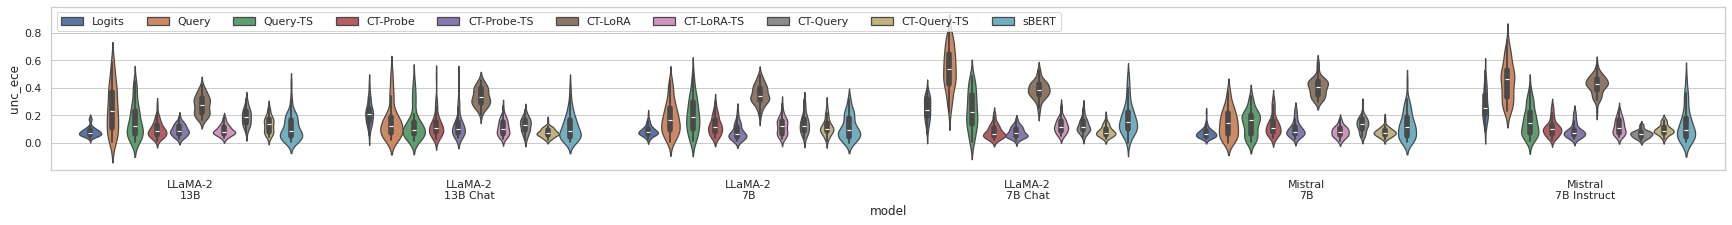

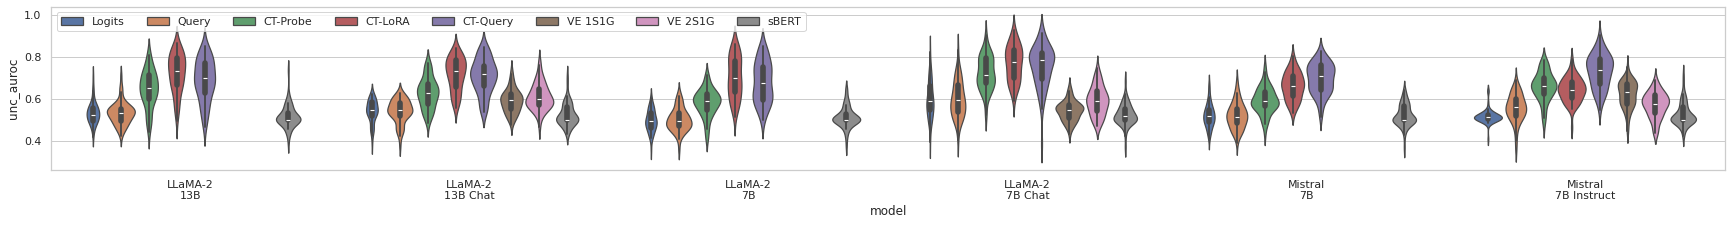

In [60]:
fig, ax = plt.subplots(figsize=(30, 3))

sns.violinplot(
    ax=ax,
    data=mcqa_df,
    hue="style",
    hue_order=["Logits", "Query", "Query-TS", "CT-Probe","CT-Probe-TS", "CT-LoRA", "CT-LoRA-TS", "CT-Query", "CT-Query-TS", "sBERT"],
    x="model",
    y="unc_ece",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left', ncol=10)

plt.show()

fig, ax = plt.subplots(figsize=(30, 3))

sns.violinplot(
    ax=ax,
    data=discr_mcqa,
    hue="style",
    hue_order=["Logits","Query", "CT-Probe", "CT-LoRA", "CT-Query", "VE 1S1G", "VE 2S1G", "sBERT"],
    x="model",
    y="unc_auroc",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left', ncol=10)

plt.show()

In [43]:
import palettable

mendl = palettable.wesanderson.Mendl_4.hex_colors
moonrise45 = palettable.wesanderson.Moonrise4_5.hex_colors

color_map = {
    # "CT": "#9468bd",
    # "CT-TS": "#9468bd",

    "CT-Query": "#5d2b8a",
    "CT-Query-TS": "#5d2b8a",

    "Query": mendl[0],
    "Query-TS": mendl[0],

    "Logits": "#6bbd33",
    "Logits-TS": "#6bbd33",

    "Samp. Counting": "#55aa6f",
    "Samp. Likelihood": "#629d90",

    "CT-Probe": "#c2a8d9",
    "CT-Probe-TS": "#c2a8d9",

    "CT-LoRA": "#9468bd",
    "CT-LoRA-TS": "#9468bd",
    
    "VE 2S1G": "#3d5fc2",
    "VE 2S2G": mendl[3],
    "VE 1S1G": mendl[1],
    "VE 1S2G": "#9ca7f2",
    "VE 2S1CoT": "#5da2da",
}


NameError: name 'mcqa_df' is not defined

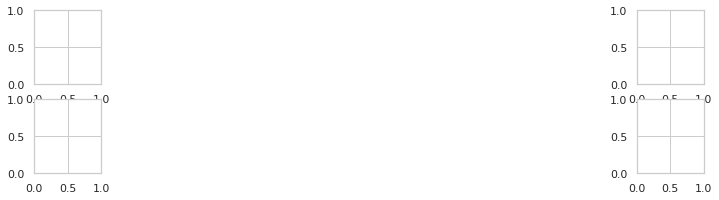

In [44]:
fig, axs = plt.subplots(
    2, 2, 
    figsize=(12, 3), 
    # constrained_layout=True
)
plt.subplots_adjust(wspace=8.0)

axs = axs.flatten()

# models = ["LLaMA-2\n7B", "LLaMA-2\n7B Chat", "LLaMA-2\n13B", "LLaMA-2\n13B Chat", "Mistral\n7B", "Mistral\n7B Instruct"]
models = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"]
hue_order = [
    "Logits-TS", "VE 1S1G", "VE 2S1G", "Query-TS",
    "CT-Probe-TS", "CT-LoRA-TS", 
    "CT-Query-TS"
]
palette = [color_map[x] for x in hue_order]

ax = axs[0]
sns.violinplot(
    data=mcqa_df,
    hue="style",
    x="model",
    y="unc_ece",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
    linewidth=0.75
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
ax.set_xticklabels([])

#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("MCQA\nECE$\downarrow$", fontsize=14)
ax.get_legend().remove()

hue_order = [
    "Logits", "Query", "VE 1S1G", "VE 2S1G", 
    "CT-Probe", "CT-LoRA", 
    "CT-Query"
]

ax = axs[1]
sns.violinplot(
    data=discr_mcqa,
    hue="style",
    x="model",
    y="unc_auroc",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
    linewidth=0.75,
)

handles1, labels1 = ax.get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

# ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("MCQA\nAUROC$\\uparrow$", fontsize=14)
ax.get_legend().remove()

ax.set_xticklabels([])


hue_order = [
    "VE 1S1G", "VE 2S1G", "Samp. Counting", "Samp. Likelihood", "Query-TS",
    "CT-Probe-TS", "CT-LoRA-TS", 
    "CT-Query-TS"
]
palette = [color_map[x] for x in hue_order]

ax = axs[2]
sns.violinplot(
    data=oe_df,
    hue="style",
    x="model",
    y="unc_ece",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
    linewidth=0.75,
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("OE\nECE$\downarrow$", fontsize=14)
ax.get_legend().remove()

hue_order = [
    "VE 1S1G", "VE 2S1G", "Samp. Counting", "Samp. Likelihood", "Query", 
    "CT-Probe", "CT-LoRA", 
    "CT-Query"
]

ax = axs[3]
sns.violinplot(
    data=discr_oe,
    hue="style",
    x="model",
    y="unc_auroc",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
    linewidth=0.75,
)

handles2, labels2 = ax.get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

# ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("OE\nAUROC$\\uparrow$", fontsize=14)
ax.get_legend().remove()


# # ax.set_title("w/o Temperature Scaling", fontsize=13)

# l = fig.legend(
#     handles=handles, labels=[l.replace("-TS","") for l in labels], ncol=8, fontsize=12,
#     columnspacing=1.25, handlelength=1.5, bbox_to_anchor=(0.98, 1.2),
# )
# # remove edge from patches in the legend
# for _l in l.get_patches():
#     _l.set_edgecolor('none')

# fig.tight_layout()
# plt.savefig("oe_violin_plots_combined.pdf", bbox_inches="tight")


# ax.set_title("w/o Temperature Scaling", fontsize=13)

handles = handles1[:1] + handles2
labels = labels1[:1] + labels2

l = fig.legend(
    handles=handles, labels=[l.replace("-TS","") for l in labels], ncol=10, fontsize=12,
    columnspacing=1.25, handlelength=1, bbox_to_anchor=(1.0, 1.13)#(0.85, 1.2),
)
# remove edge from patches in the legend
for _l in l.get_patches():
    _l.set_edgecolor('none')

fig.tight_layout()
plt.savefig("violin_plots_combined.pdf", bbox_inches="tight")

In [16]:
mcqa_df

,dataset,model,style,N,logits_ece,acc,unc_acc,unc_auroc,unc_ece,ts,fuzzy_gpt-3.5-turbo-1106_acc,fuzzy_gpt-3.5-turbo-1106_unc_acc,fuzzy_gpt-3.5-turbo-1106_unc_auroc,fuzzy_gpt-3.5-turbo-1106_unc_ece
0,mmlu:abstract_algebra,LLaMA-2\n13B,CT-LoRA,100.0,0.060608,0.330000,0.590000,0.535730,0.348945,20.910697,NaN,NaN,NaN,NaN
1,mmlu:abstract_algebra,LLaMA-2\n13B,CT-LoRA-TS,100.0,0.060608,0.330000,0.590000,0.536183,0.121484,21.159692,NaN,NaN,NaN,NaN
2,mmlu:abstract_algebra,LLaMA-2\n13B,CT-Probe,100.0,0.042223,0.310000,0.710000,0.364189,0.042607,19.084298,NaN,NaN,NaN,NaN
3,mmlu:abstract_algebra,LLaMA-2\n13B,CT-Query,100.0,0.062484,0.330000,0.690000,0.496382,0.265054,15.808415,NaN,NaN,NaN,NaN
4,mmlu:abstract_algebra,LLaMA-2\n13B,CT-Query-Probe,100.0,0.062484,0.330000,0.620000,0.513795,0.271758,15.733853,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,mmlu:world_religions,Mistral\n7B Instruct,Logits-TS,171.0,0.469946,0.830409,0.321637,0.386838,0.469946,65.799067,NaN,NaN,NaN,NaN
3884,mmlu:world_religions,Mistral\n7B Instruct,Query,171.0,0.145896,0.830409,0.321637,0.640845,0.585752,13.192735,NaN,NaN,NaN,NaN
3885,mmlu:world_religions,Mistral\n7B Instruct,Query-TS,171.0,0.132921,0.830409,0.321637,0.388052,0.289640,36.233707,NaN,NaN,NaN,NaN
3886,mmlu:world_religions,Mistral\n7B Instruct,VE 1S1G,171.0,NaN,0.789474,0.795322,0.671502,0.212810,45.698444,0.789474,0.795322,0.671502,0.212810


['abstract_algebra', 'anatomy', 'astronomy', 'business_ethics', 'clinical_knowledge', 'college_biology', 'college_chemistry', 'college_computer_science', 'college_mathematics', 'college_medicine', 'college_physics', 'computer_security', 'conceptual_physics', 'econometrics', 'electrical_engineering', 'elementary_mathematics', 'formal_logic', 'global_facts', 'high_school_biology', 'high_school_chemistry', 'high_school_computer_science', 'high_school_european_history', 'high_school_geography', 'high_school_government_and_politics', 'high_school_macroeconomics', 'high_school_mathematics', 'high_school_microeconomics', 'high_school_physics']


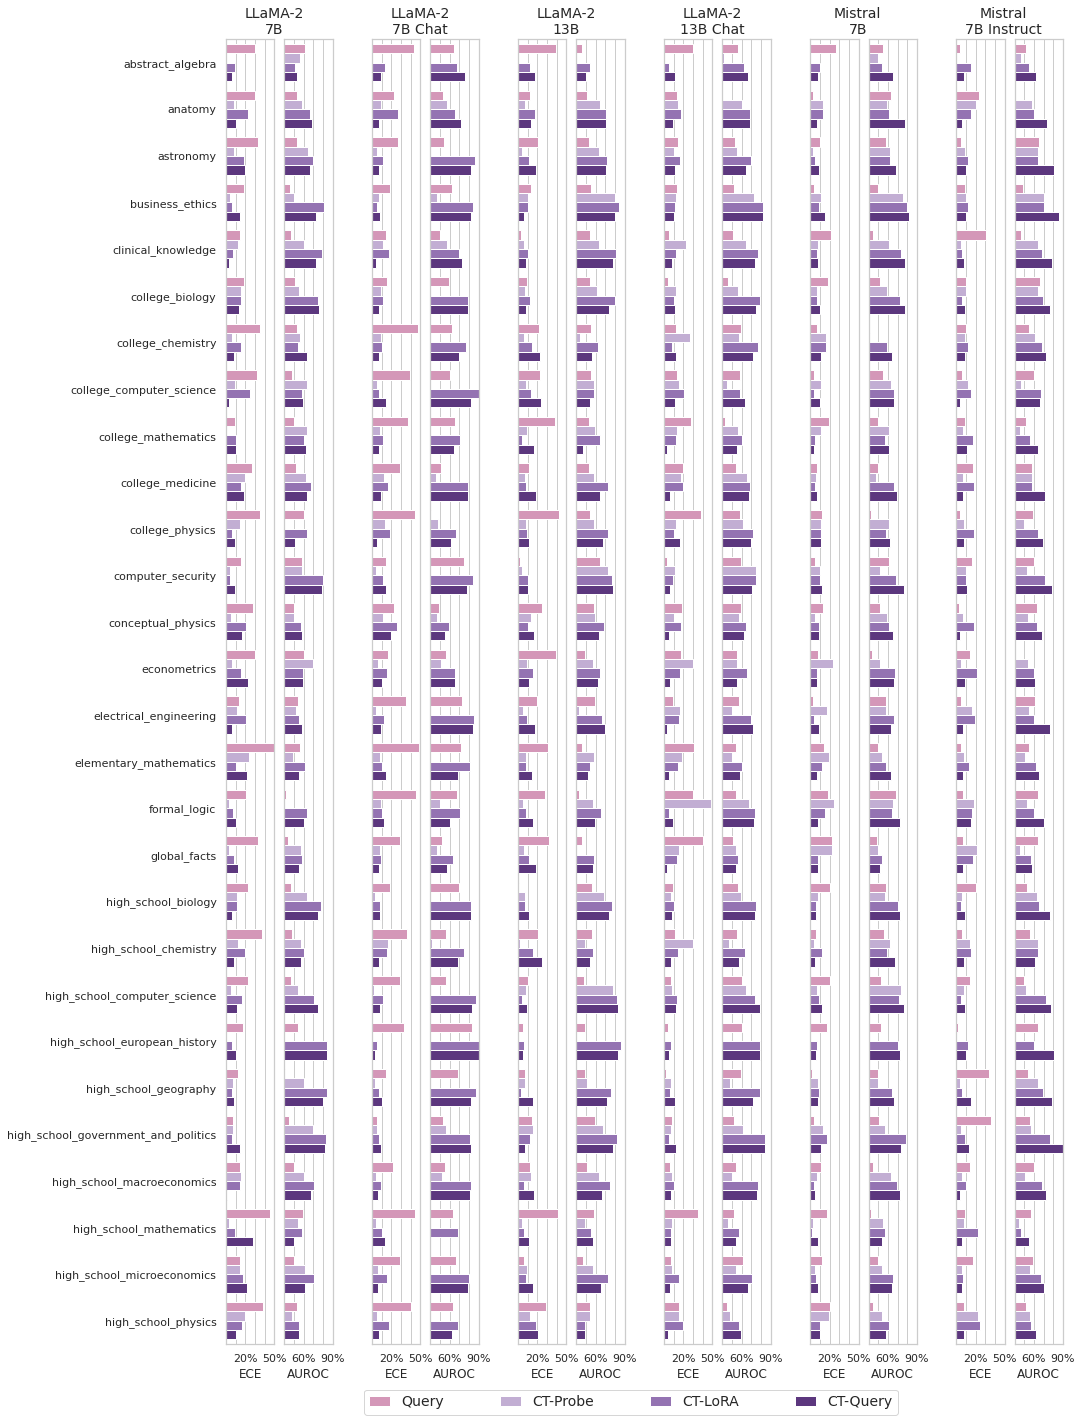

['high_school_psychology', 'high_school_statistics', 'high_school_us_history', 'high_school_world_history', 'human_aging', 'human_sexuality', 'international_law', 'jurisprudence', 'logical_fallacies', 'machine_learning', 'management', 'marketing', 'medical_genetics', 'miscellaneous', 'moral_disputes', 'moral_scenarios', 'nutrition', 'philosophy', 'prehistory', 'professional_accounting', 'professional_law', 'professional_medicine', 'professional_psychology', 'public_relations', 'security_studies', 'sociology', 'us_foreign_policy', 'virology', 'world_religions']


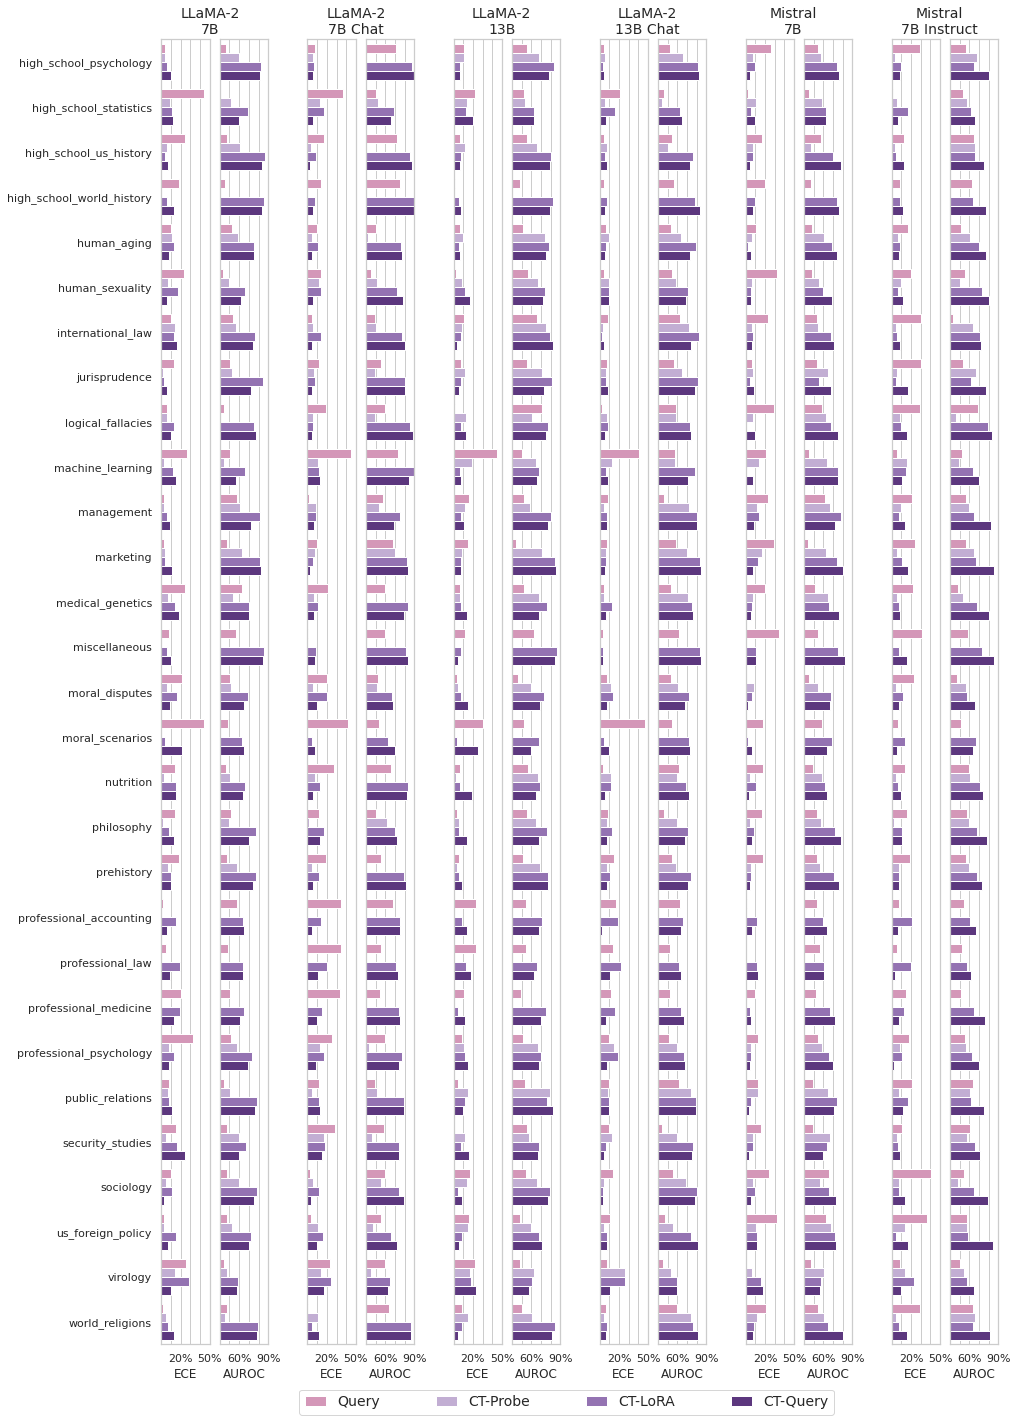

In [14]:
import warnings
warnings.filterwarnings("ignore")

mcqa_df['dataset'] = mcqa_df['dataset'].apply(lambda x: x.replace("mmlu:",""))
discr_mcqa['dataset'] = discr_mcqa['dataset'].apply(lambda x: x.replace("mmlu:",""))

models = ["LLaMA-2\n7B", "LLaMA-2\n7B Chat",  "LLaMA-2\n13B", "LLaMA-2\n13B Chat", "Mistral\n7B", "Mistral\n7B Instruct"]

width_ratios = []
for _ in range(len(models)):
    width_ratios += [1,1,0.4]
width_ratios = width_ratios[:-1]

datasets = sorted(mcqa_df["dataset"].unique())
dataset_splits = datasets[:len(datasets)//2], datasets[len(datasets)//2:]

for j, split in enumerate(dataset_splits):
    
    fig, axs = plt.subplots(
        1, len(width_ratios),
        figsize=(2.5 * len(models), 24), 
        sharey=True,
        gridspec_kw={
            'width_ratios': width_ratios,
            #space between plots
            'wspace': 0.25,
            'hspace': 0.2,
        },
        # constrained_layout=True
    )
    
    print(split)

    for i, model in enumerate(models):

        ax = axs[3*i]
        styles = ["Query-TS", "CT-Probe-TS", "CT-LoRA-TS","CT-Query-TS"]

        _df = mcqa_df[mcqa_df["style"].isin(styles) & (mcqa_df["model"] == model)]
        _df = _df[_df["dataset"].isin(split)]

        sns.barplot(
            ax=ax,
            data=_df,
            y="dataset",
            x="unc_ece",
            hue="style",
            hue_order=styles,
            palette=[color_map[x] for x in styles],
            err_kws={'linewidth': 1.0}
        )

        ax.legend().remove()
        ax.set_xlim((0.0, 0.5))
        ax.set_ylabel("")
        ax.set_xlabel("ECE")
        ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
        vals = ax.get_xticks()
        ax.set_xticklabels(['{:,.0%}'.format(x) if i % 3 == 0 else '' for i, x in enumerate(vals)])

        ax = axs[3*i+1]
        styles = ["Query", "CT-Probe", "CT-LoRA","CT-Query"]

        _df = mcqa_df[mcqa_df["style"].isin(styles) & (mcqa_df["model"] == model)]
        _df = _df[_df["dataset"].isin(split)]

        sns.barplot(
            ax=ax,
            data=_df,
            y="dataset",
            x="unc_auroc",
            hue="style",
            hue_order=styles,
            palette=[color_map[x] for x in styles],
            err_kws={'linewidth': 1.0},
        )

        ax.legend().remove()
        ax.set_xlim((0.4, 0.9))
        ax.set_xlabel("AUROC")
        ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
        vals = ax.get_xticks()
        ax.set_xticklabels(['{:,.0%}'.format(x) if i % 3 == 0 else '' for i, x in enumerate(vals)])

        #put a label for the model above the two subplots associated with the model
        fig.text(
            0.135 * i + 0.17, 0.89, model, 
            ha='center', va='center', fontsize=14
        )

        if i < len(models) - 1:
            ax = axs[3*i+2]
            ax.axis('off')

    #add a legend at the bottom

    handles, labels = axs[0].get_legend_handles_labels()
    l = fig.legend(
        handles=handles, labels=[l.replace("-TS","") for l in labels], ncol=7, fontsize=14,
        columnspacing=4, handlelength=1.5, bbox_to_anchor=(0.5, 0.08), loc='lower center'
    )

    fig.savefig(f"mcqa_bar_plots_per_category_{j}.pdf", bbox_inches="tight")
    plt.show()

In [9]:
means = mcqa_df.groupby(["model", "style"]).mean().reset_index()[["model","style","unc_ece"]]
stds = mcqa_df.groupby(["model", "style"]).std().reset_index()[["model","style","unc_ece"]]
ece_joined = means.merge(stds, on=["model", "style"], suffixes=("_mean", "_std"))
# make string with mean and std as mean +/- std
ece_joined['ECE'] = ece_joined.apply(lambda x: f"{x['unc_ece_mean']:.2f} ± {x['unc_ece_std']:.2f}", axis=1)
ece_joined = ece_joined[["model","style","ECE"]]

ece_joined = ece_joined[ece_joined["style"].isin(["Logits", "VE 1S1G", "VE 2S1G", "Query-TS", "CT-Probe-TS", "CT-LoRA-TS", "CT-Query-TS"])]
ece_joined["style"] = ece_joined["style"].apply(lambda x: x.replace("-TS", ""))

means = discr_mcqa.groupby(["model", "style"]).mean().reset_index()[["model","style","unc_auroc"]]
stds = discr_mcqa.groupby(["model", "style"]).std().reset_index()[["model","style","unc_auroc"]]
auroc_joined = means.merge(stds, on=["model", "style"], suffixes=("_mean", "_std"))
# make string with mean and std as mean +/- std
auroc_joined['AUROC'] = auroc_joined.apply(lambda x: f"{x['unc_auroc_mean']:.2f} ± {x['unc_auroc_std']:.2f}", axis=1)
auroc_joined = auroc_joined[["model","style","AUROC"]]

joined = ece_joined.merge(auroc_joined, on=["model", "style"])
joined["model"] = joined["model"].apply(lambda x: x.replace("\n", " "))

to_print = joined[joined["style"].isin(["Logits", "Query", "CT-Probe", "CT-LoRA", "CT-Query", "VE 1S1G", "VE 2S1G", "Query-TS", "CT-Probe-TS", "CT-LoRA-TS", "CT-Query-TS"])]

models = ["LLaMA-2 7B Chat", "LLaMA-2 13B Chat", "Mistral 7B Instruct"]
for model in models:
    print(model)
    df = to_print[to_print["model"] == model][["style", "ECE", "AUROC"]]
    df = df.sort_values(by="ECE", ascending=False)
    print(df.to_markdown(index=False))
    print("\n")


LLaMA-2 7B Chat
| style    | ECE         | AUROC       |
|:---------|:------------|:------------|
| VE 1S1G  | 0.30 ± 0.09 | 0.54 ± 0.05 |
| Logits   | 0.24 ± 0.08 | 0.59 ± 0.08 |
| Query    | 0.23 ± 0.14 | 0.59 ± 0.08 |
| VE 2S1G  | 0.16 ± 0.07 | 0.59 ± 0.07 |
| CT-LoRA  | 0.13 ± 0.05 | 0.77 ± 0.08 |
| CT-Query | 0.09 ± 0.04 | 0.75 ± 0.10 |
| CT-Probe | 0.08 ± 0.04 | 0.72 ± 0.08 |


LLaMA-2 13B Chat
| style    | ECE         | AUROC       |
|:---------|:------------|:------------|
| VE 1S1G  | 0.23 ± 0.11 | 0.59 ± 0.06 |
| Logits   | 0.22 ± 0.08 | 0.54 ± 0.05 |
| VE 2S1G  | 0.17 ± 0.09 | 0.61 ± 0.06 |
| Query    | 0.13 ± 0.10 | 0.54 ± 0.06 |
| CT-Probe | 0.12 ± 0.08 | 0.63 ± 0.07 |
| CT-LoRA  | 0.11 ± 0.05 | 0.72 ± 0.08 |
| CT-Query | 0.08 ± 0.03 | 0.71 ± 0.08 |


Mistral 7B Instruct
| style    | ECE         | AUROC       |
|:---------|:------------|:------------|
| VE 2S1G  | 0.29 ± 0.08 | 0.57 ± 0.06 |
| Logits   | 0.27 ± 0.10 | 0.51 ± 0.02 |
| VE 1S1G  | 0.25 ± 0.09 | 0.62 ± 0.06 |


/tmp/ipykernel_1139858/1009937015.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = mcqa_df.groupby(["model", "style"]).mean().reset_index()[["model","style","unc_ece"]]
/tmp/ipykernel_1139858/1009937015.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stds = mcqa_df.groupby(["model", "style"]).std().reset_index()[["model","style","unc_ece"]]
/tmp/ipykernel_1139858/1009937015.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be val

/tmp/ipykernel_1139858/2085175507.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
/tmp/ipykernel_1139858/2085175507.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


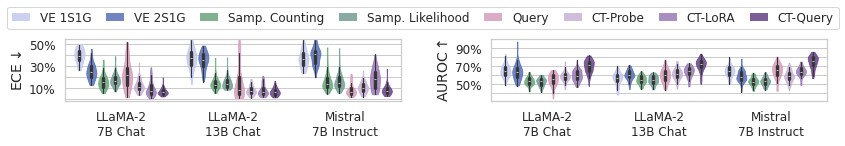

In [10]:
fig, axs = plt.subplots(
    1, 2, 
    figsize=(12, 1.75), 
    # constrained_layout=True
)
plt.subplots_adjust(wspace=8.0)

# models = ["LLaMA-2\n7B", "LLaMA-2\n7B Chat", "LLaMA-2\n13B", "LLaMA-2\n13B Chat", "Mistral\n7B", "Mistral\n7B Instruct"]
models = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"]
hue_order = [
    "VE 1S1G", "VE 2S1G", "Samp. Counting", "Samp. Likelihood", "Query-TS",
    "CT-Probe-TS", "CT-LoRA-TS", 
    "CT-Query-TS"
]
palette = [color_map[x] for x in hue_order]

ax = axs[0]
sns.violinplot(
    data=oe_df,
    hue="style",
    x="model",
    y="unc_ece",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
    linewidth=0.75,
)

handles, labels = ax.get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("ECE$\downarrow$", fontsize=14)
ax.get_legend().remove()

hue_order = [
    "VE 1S1G", "VE 2S1G", "Samp. Counting", "Samp. Likelihood", "Query", 
    "CT-Probe", "CT-LoRA", 
    "CT-Query"
]

ax = axs[1]
sns.violinplot(
    data=discr_oe,
    hue="style",
    x="model",
    y="unc_auroc",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
    linewidth=0.75,
)

handles, labels = ax.get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

# ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("AUROC$\\uparrow$", fontsize=14)
ax.get_legend().remove()


# ax.set_title("w/o Temperature Scaling", fontsize=13)

l = fig.legend(
    handles=handles, labels=[l.replace("-TS","") for l in labels], ncol=8, fontsize=12,
    columnspacing=1.25, handlelength=1.5, bbox_to_anchor=(0.98, 1.2),
)
# remove edge from patches in the legend
for _l in l.get_patches():
    _l.set_edgecolor('none')

fig.tight_layout()
plt.savefig("oe_violin_plots_combined.pdf", bbox_inches="tight")

/tmp/ipykernel_1139858/200644076.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
/tmp/ipykernel_1139858/200644076.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


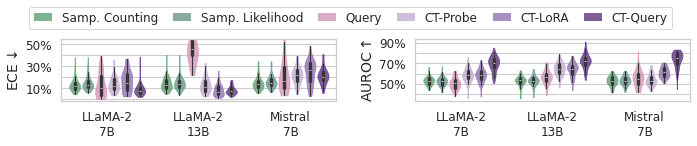

In [11]:
fig, axs = plt.subplots(
    1, 2, 
    figsize=(10, 1.75), 
    # constrained_layout=True
)
plt.subplots_adjust(wspace=8.0)

# models = ["LLaMA-2\n7B", "LLaMA-2\n7B Chat", "LLaMA-2\n13B", "LLaMA-2\n13B Chat", "Mistral\n7B", "Mistral\n7B Instruct"]
models = ["LLaMA-2\n7B", "LLaMA-2\n13B", "Mistral\n7B"]
hue_order = [
    "Samp. Counting", "Samp. Likelihood", "Query-TS",
    "CT-Probe-TS", "CT-LoRA-TS", 
    "CT-Query-TS"
]
palette = [color_map[x] for x in hue_order]

ax = axs[0]
sns.violinplot(
    data=oe_df,
    hue="style",
    x="model",
    y="unc_ece",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
    linewidth=0.75,
)

handles, labels = ax.get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("ECE$\downarrow$", fontsize=14)
ax.get_legend().remove()

hue_order = [
    "Samp. Counting", "Samp. Likelihood", "Query", 
    "CT-Probe", "CT-LoRA", 
    "CT-Query"
]

ax = axs[1]
sns.violinplot(
    data=discr_oe,
    hue="style",
    x="model",
    y="unc_auroc",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
    linewidth=0.75,
)

handles, labels = ax.get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

# ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("AUROC$\\uparrow$", fontsize=14)
ax.get_legend().remove()


# ax.set_title("w/o Temperature Scaling", fontsize=13)

l = fig.legend(
    handles=handles, labels=[l.replace("-TS","") for l in labels], ncol=8, fontsize=12,
    columnspacing=1.25, handlelength=1.5, bbox_to_anchor=(0.95, 1.2),
)
# remove edge from patches in the legend
for _l in l.get_patches():
    _l.set_edgecolor('none')

fig.tight_layout()
plt.savefig("oe_violin_plots_combined_non_chat.pdf", bbox_inches="tight")

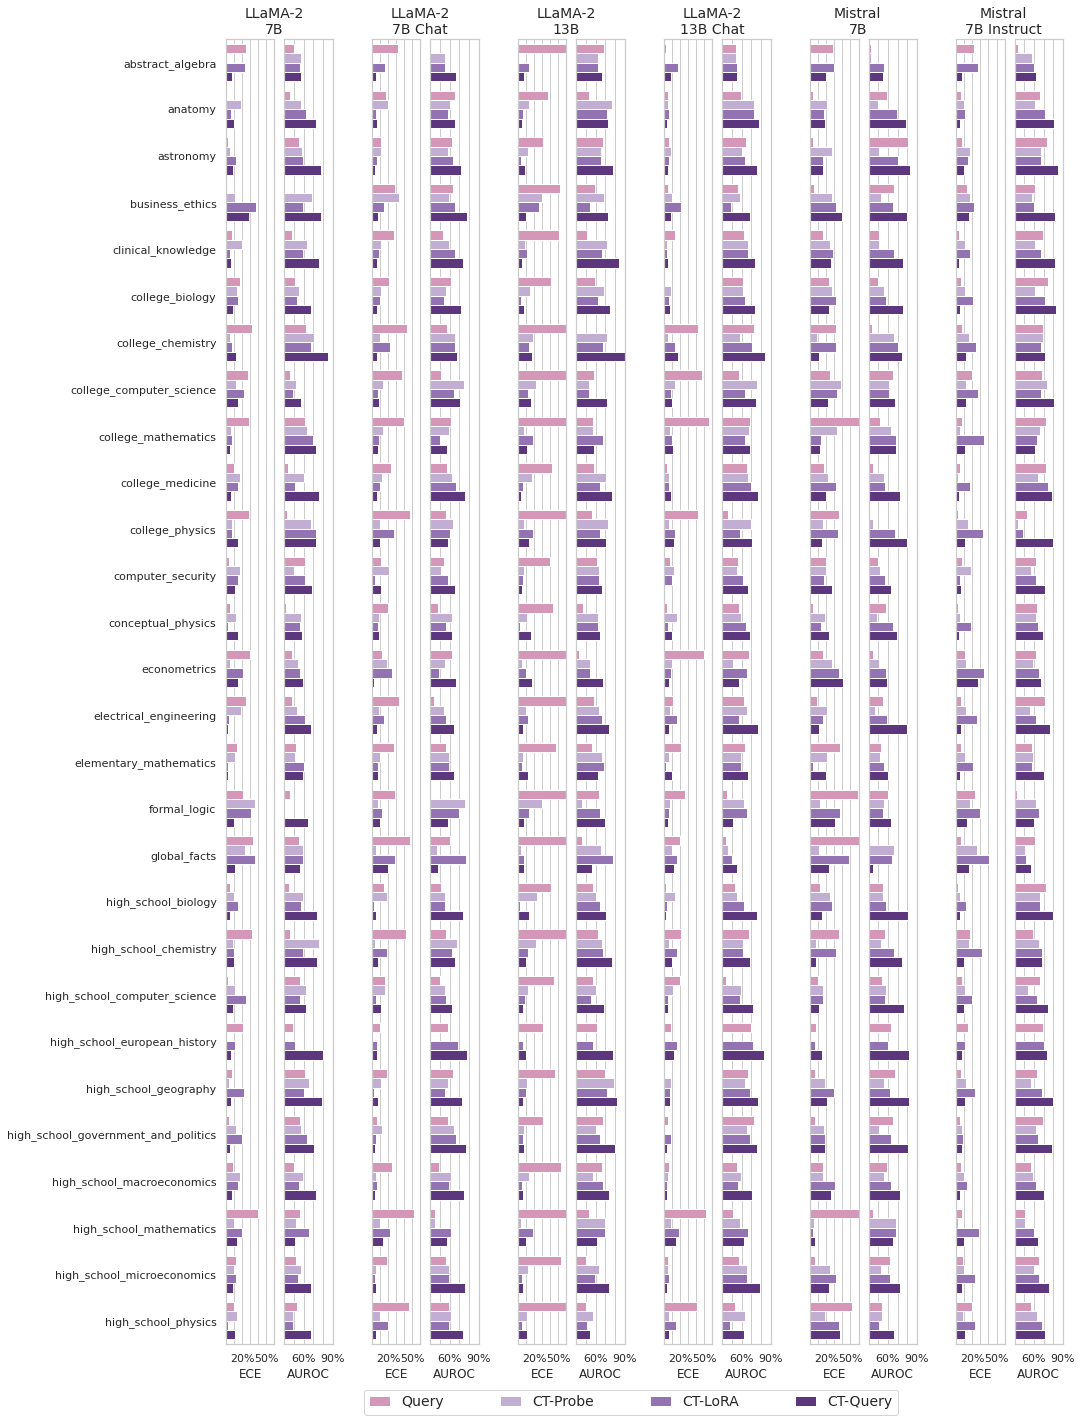

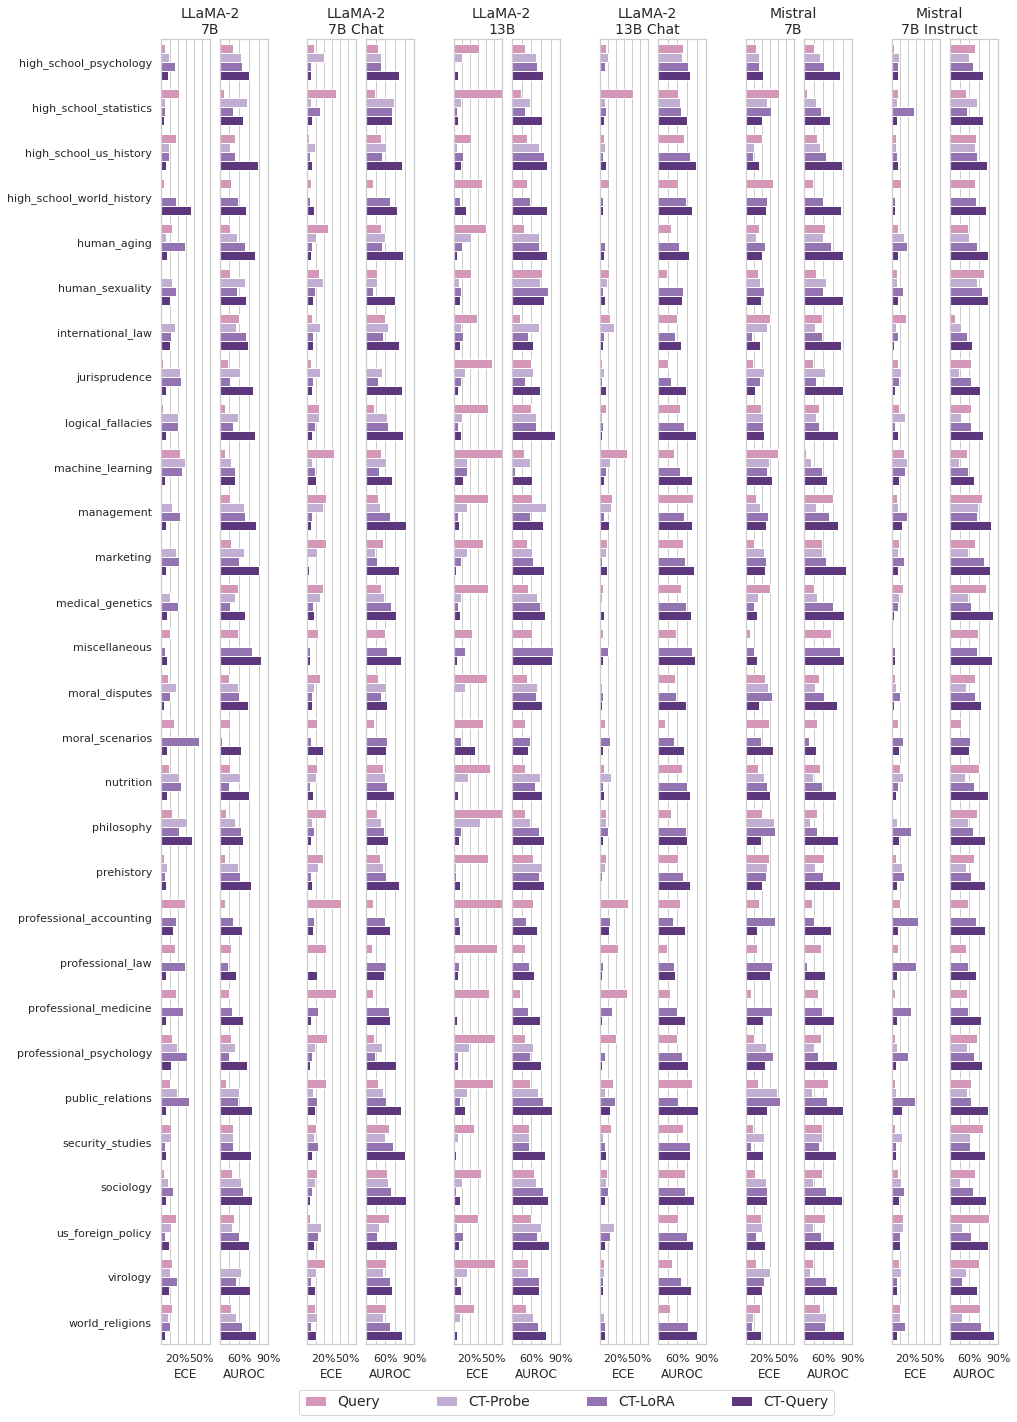

In [15]:
oe_df['dataset'] = oe_df['dataset'].apply(lambda x: x.replace("mmlu:",""))
discr_oe['dataset'] = discr_oe['dataset'].apply(lambda x: x.replace("mmlu:",""))

models = ["LLaMA-2\n7B", "LLaMA-2\n7B Chat",  "LLaMA-2\n13B", "LLaMA-2\n13B Chat", "Mistral\n7B", "Mistral\n7B Instruct"]

width_ratios = []
for _ in range(len(models)):
    width_ratios += [1,1,0.4]
width_ratios = width_ratios[:-1]

datasets = sorted(oe_df["dataset"].unique())
dataset_splits = datasets[:len(datasets)//2], datasets[len(datasets)//2:]

for j, split in enumerate(dataset_splits):

    fig, axs = plt.subplots(
        1, len(width_ratios),
        figsize=(2.5 * len(models), 24), 
        sharey=True,
        gridspec_kw={
            'width_ratios': width_ratios,
            #space between plots
            'wspace': 0.25,
            'hspace': 0.2,
        },
        # constrained_layout=True
    )

    for i, model in enumerate(models):

        ax = axs[3*i]
        styles = ["Query-TS", "CT-Probe-TS", "CT-LoRA-TS","CT-Query-TS"]

        _df = oe_df[oe_df["style"].isin(styles) & (oe_df["model"] == model)]
        _df = _df[_df["dataset"].isin(split)]

        sns.barplot(
            ax=ax,
            data=_df,
            y="dataset",
            x="unc_ece",
            hue="style",
            hue_order=styles,
            palette=[color_map[x] for x in styles],
            err_kws={'linewidth': 1.0}
        )

        ax.legend().remove()
        ax.set_xlim((0.0, 0.6))
        ax.set_ylabel("")
        ax.set_xlabel("ECE")
        ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
        vals = ax.get_xticks()
        ax.set_xticklabels(['{:,.0%}'.format(x) if i % 3 == 0 else '' for i, x in enumerate(vals)])

        ax = axs[3*i+1]
        styles = ["Query", "CT-Probe", "CT-LoRA","CT-Query"]

        _df = discr_oe[discr_oe["style"].isin(styles) & (discr_oe["model"] == model)]
        _df = _df[_df["dataset"].isin(split)]

        sns.barplot(
            ax=ax,
            data=_df,
            y="dataset",
            x="unc_auroc",
            hue="style",
            hue_order=styles,
            palette=[color_map[x] for x in styles],
            err_kws={'linewidth': 1.0},
        )

        ax.legend().remove()
        ax.set_xlim((0.4, 0.9))
        ax.set_xlabel("AUROC")
        ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
        vals = ax.get_xticks()
        ax.set_xticklabels(['{:,.0%}'.format(x) if i % 3 == 0 else '' for i, x in enumerate(vals)])

        #put a label for the model above the two subplots associated with the model
        fig.text(
            0.135 * i + 0.17, 0.89, model, 
            ha='center', va='center', fontsize=14
        )

        if i < len(models) - 1:
            ax = axs[3*i+2]
            ax.axis('off')

    #add a legend at the bottom

    handles, labels = axs[0].get_legend_handles_labels()
    l = fig.legend(
        handles=handles, labels=[l.replace("-TS","") for l in labels], ncol=7, fontsize=14,
        columnspacing=4, handlelength=1.5, bbox_to_anchor=(0.5, 0.08), loc='lower center'
    )

    fig.savefig(f"oe_bar_plots_per_category_{j}.pdf", bbox_inches="tight")

In [12]:
means = oe_df.groupby(["model", "style"]).mean().reset_index()[["model","style","unc_ece"]]
stds = oe_df.groupby(["model", "style"]).std().reset_index()[["model","style","unc_ece"]]
ece_joined = means.merge(stds, on=["model", "style"], suffixes=("_mean", "_std"))
# make string with mean and std as mean +/- std
ece_joined['ECE'] = ece_joined.apply(lambda x: f"{x['unc_ece_mean']:.2f} ± {x['unc_ece_std']:.2f}", axis=1)
ece_joined = ece_joined[["model","style","ECE"]]

ece_joined = ece_joined[ece_joined["style"].isin(["VE 1S1G", "VE 2S1G", "Query-TS", "CT-Probe-TS", "CT-LoRA-TS", "CT-Query-TS", "Samp. Counting", "Samp. Likelihood"])]
ece_joined["style"] = ece_joined["style"].apply(lambda x: x.replace("-TS", ""))

means = discr_oe.groupby(["model", "style"]).mean().reset_index()[["model","style","unc_auroc"]]
stds = discr_oe.groupby(["model", "style"]).std().reset_index()[["model","style","unc_auroc"]]
auroc_joined = means.merge(stds, on=["model", "style"], suffixes=("_mean", "_std"))
# make string with mean and std as mean +/- std
auroc_joined['AUROC'] = auroc_joined.apply(lambda x: f"{x['unc_auroc_mean']:.2f} ± {x['unc_auroc_std']:.2f}", axis=1)
auroc_joined = auroc_joined[["model","style","AUROC"]]

joined = ece_joined.merge(auroc_joined, on=["model", "style"])
joined["model"] = joined["model"].apply(lambda x: x.replace("\n", " "))

to_print = joined[joined["style"].isin(["Logits", "Query", "CT-Probe", "CT-LoRA", "CT-Query", "VE 1S1G", "VE 2S1G", "Samp. Counting", "Samp. Likelihood"])]

models = ["LLaMA-2 7B Chat", "LLaMA-2 13B Chat", "Mistral 7B Instruct"]
for model in models:
    print(model)
    df = to_print[to_print["model"] == model][["style", "ECE", "AUROC"]]
    df = df.sort_values(by="ECE", ascending=False)
    print(df.to_markdown(index=False))
    print("\n")

LLaMA-2 7B Chat
| style            | ECE         | AUROC       |
|:-----------------|:------------|:------------|
| VE 1S1G          | 0.39 ± 0.06 | 0.65 ± 0.07 |
| VE 2S1G          | 0.25 ± 0.07 | 0.63 ± 0.09 |
| Query            | 0.23 ± 0.13 | 0.55 ± 0.07 |
| Samp. Likelihood | 0.18 ± 0.06 | 0.53 ± 0.05 |
| Samp. Counting   | 0.16 ± 0.06 | 0.53 ± 0.04 |
| CT-Probe         | 0.12 ± 0.06 | 0.59 ± 0.06 |
| CT-LoRA          | 0.10 ± 0.07 | 0.60 ± 0.06 |
| CT-Query         | 0.07 ± 0.03 | 0.70 ± 0.07 |


LLaMA-2 13B Chat
| style            | ECE         | AUROC       |
|:-----------------|:------------|:------------|
| VE 1S1G          | 0.37 ± 0.09 | 0.56 ± 0.07 |
| VE 2S1G          | 0.35 ± 0.08 | 0.60 ± 0.06 |
| Query            | 0.15 ± 0.16 | 0.60 ± 0.08 |
| Samp. Likelihood | 0.15 ± 0.05 | 0.55 ± 0.05 |
| Samp. Counting   | 0.14 ± 0.05 | 0.55 ± 0.05 |
| CT-LoRA          | 0.08 ± 0.05 | 0.64 ± 0.06 |
| CT-Probe         | 0.08 ± 0.04 | 0.62 ± 0.06 |
| CT-Query         | 0.07 ± 0.03 |

/tmp/ipykernel_1139858/301057048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = oe_df.groupby(["model", "style"]).mean().reset_index()[["model","style","unc_ece"]]
/tmp/ipykernel_1139858/301057048.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stds = oe_df.groupby(["model", "style"]).std().reset_index()[["model","style","unc_ece"]]
/tmp/ipykernel_1139858/301057048.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for 

In [13]:
df = pd.DataFrame([
    {"Model": "Llama 2 7B", "With KL": 0.763, "Without KL": 0.926},
    {"Model": "Llama 2 7B Chat", "With KL": 0.801, "Without KL": 1.031},
    {"Model": "Llama 2 13B", "With KL": 0.574, "Without KL": 0.957},
    {"Model": "Llama 2 13B Chat", "With KL": 0.628, "Without KL": 1.166},
    {"Model": "Mistral 7B", "With KL": 1.064, "Without KL": 1.191},
    {"Model": "Mistral 7B Instruct", "With KL": 0.738, "Without KL": 0.926},
])

print(df.to_markdown(index=False))

| Model               |   With KL |   Without KL |
|:--------------------|----------:|-------------:|
| Llama 2 7B          |     0.763 |        0.926 |
| Llama 2 7B Chat     |     0.801 |        1.031 |
| Llama 2 13B         |     0.574 |        0.957 |
| Llama 2 13B Chat    |     0.628 |        1.166 |
| Mistral 7B          |     1.064 |        1.191 |
| Mistral 7B Instruct |     0.738 |        0.926 |


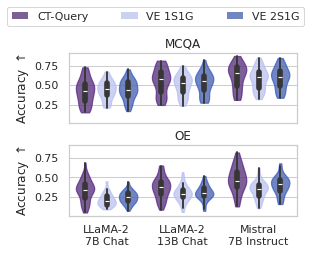

In [14]:
fig, axs = plt.subplots(
    2, 1, 
    figsize=(4, 3),
    constrained_layout=True,
    sharex=True,
    sharey=True,
)

hue_order = ["CT-Query", "VE 1S1G", "VE 2S1G"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    ax=axs[0],
    data=mcqa_df,
    hue="style",
    x="model",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    y="acc",
    hue_order=["CT-Query", "VE 1S1G", "VE 2S1G"],
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
)

from matplotlib.collections import PolyCollection
violins = [art for art in axs[0].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

axs[0].legend().remove()
axs[0].set_xlabel("")
axs[0].set_ylabel("Accuracy $\\uparrow$", fontsize=12)
axs[0].set_title("MCQA")


sns.violinplot(
    ax=axs[1],
    data=oe_df,
    hue="style",
    x="model",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    y="acc",
    hue_order=["CT-Query", "VE 1S1G", "VE 2S1G"],
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
)

from matplotlib.collections import PolyCollection
violins = [art for art in axs[1].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

axs[1].legend().remove()
axs[1].set_xlabel("")
axs[1].set_ylabel("Accuracy $\\uparrow$", fontsize=12)
axs[1].set_title("OE")

handles, labels = axs[0].get_legend_handles_labels()

l = fig.legend(
    handles=handles, 
    labels=labels, 
    loc='upper center', 
    ncol=3,
    columnspacing=3,
    handlelength=1.5,
    #move legend up vertically
    bbox_to_anchor=(0.5, 1.15),
)

#remove edge from patches in the legend
for x in l.get_patches():
    x.set_edgecolor('none')

plt.savefig("qa_acc_violin_plots.pdf", bbox_inches="tight")

In [15]:
import glob
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


all_dfs = []

for fn in glob.glob("results/eval-mmlu_choice-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT-Query"
    df["mode_tag"] = "MCQA" # "MCQA $\\rightarrow$ MCQA"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-ct-oe_transfer/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT-Query (Transfer)"
    df["mode_tag"] = "MCQA" #"OE $\\rightarrow$ MCQA"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT-Query"
    df["mode_tag"] = "OE" #"OE $\\rightarrow$ OE"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct-choice_transfer/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT-Query (Transfer)"
    df["mode_tag"] = "OE" #"MCQA $\\rightarrow$ OE"
    all_dfs.append(df)


for fn in glob.glob("results/eval-mmlu_choice-lora_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT-LoRA"
    df["mode_tag"] = "MCQA" #"MCQA $\\rightarrow$ MCQA"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-lora_probe-choice_transfer/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT-LoRA (Transfer)"
    df["mode_tag"] = "OE" #"MCQA $\\rightarrow$ OE"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-lora_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT-LoRA"
    df["mode_tag"] = "OE" #"OE $\\rightarrow$ OE"
    all_dfs.append(df)


for fn in glob.glob("results/eval-mmlu_choice-lora_probe-oe_transfer/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT-LoRA (Transfer)"
    df["mode_tag"] = "MCQA" #"OE $\\rightarrow$ MCQA"
    all_dfs.append(df)

ct_df = pd.concat(all_dfs)

mode_tag_map = {
    "choice": "MCQA",
    "oe": "OE",
}

probe_df = pd.read_csv("../fresh_classifier_results.csv")
# probe_df["mode_tag"] = probe_df["train_mode"].apply(lambda x: mode_tag_map[x]) + " $\\rightarrow$ " + probe_df["eval_mode"].apply(lambda x: mode_tag_map[x])
probe_df["mode_tag"] = probe_df["eval_mode"].apply(lambda x: mode_tag_map[x])
probe_df["method_name"] = 'CT-Probe'
probe_df["method_name"] = probe_df.apply(lambda x: x["method_name"] + (" (Transfer)" if x["train_mode"] != x["eval_mode"] else ""), axis=1)

all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "Query"
    df["mode_tag"] = "MCQA" #"MCQA $\\rightarrow$ OE"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "Query"
    df["mode_tag"] = "OE" #"OE $\\rightarrow$ MCQA"
    all_dfs.append(df)

base_df = pd.concat(all_dfs)

df = pd.concat([probe_df, ct_df, base_df])

#aggregate by model name
df = df.groupby(["model_name", "method_name", "dataset", "mode_tag"]).mean().reset_index()
# df["unc_ece"] = df["unc_ece"].fillna(df["fuzzy_gpt-3.5-turbo-1106_unc_ece"])
# df["unc_auroc"] = df["unc_auroc"].fillna(df["fuzzy_gpt-3.5-turbo-1106_unc_auroc"])

model_name_map = {
    "llama2_7b": "LLaMA-2 7B",
    "llama2_7b_chat": "LLaMA-2 7B Chat",
    "llama2_13b": "LLaMA-2 13B",
    "llama2_13b_chat": "LLaMA-2 13B Chat",
    "mistral_7b": "Mistral 7B",
    "mistral_7b_instruct": "Mistral 7B Instruct",
}

df["model_name"] = df["model_name"].apply(lambda x: model_name_map[x])

/tmp/ipykernel_1139858/1900483251.py:111: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(["model_name", "method_name", "dataset", "mode_tag"]).mean().reset_index()


In [ ]:
df["method_name"].unique()

array(['CT-LoRA', 'CT-LoRA (Transfer)', 'CT-Probe', 'CT-Probe (Transfer)',
       'CT-Query', 'CT-Query (Transfer)', 'Query'], dtype=object)

/tmp/ipykernel_934797/3647783536.py:53: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(
/tmp/ipykernel_934797/3647783536.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
/tmp/ipykernel_934797/3647783536.py:104: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(
/tmp/ipykernel_934797/3647783536.py:53: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(
/tmp/ipykernel_934797/3647783536.py:104: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(
/tmp/ipykernel_934797/3647783536.py:53: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(
/tmp/ipykernel_934797/3647783536.py:104: Use

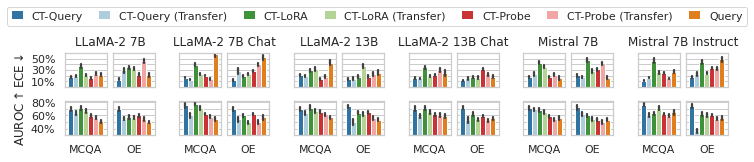

In [ ]:
sns.set_theme(style="whitegrid")

palette = sns.color_palette("Paired",8)#[1::2]
#reverse all pairs of colors
for i in range(0, len(palette), 2):
    palette[i], palette[i + 1] = palette[i + 1], palette[i]
# palette = palette[1:7:2] + palette[7:8] + palette[0:6:2]

plot_metric = "unc_ece"
# hue_order = ["CT-Query", "CT-LoRA", "CT-Probe", "Query", "CT-Query (Transfer)", "CT-LoRA (Transfer)", "CT-Probe (Transfer)"]
hue_order = [
    "CT-Query", "CT-Query (Transfer)", 
    "CT-LoRA", "CT-LoRA (Transfer)", 
    "CT-Probe", "CT-Probe (Transfer)", 
    "Query"
]

model_names = [
    "LLaMA-2 7B",
    "LLaMA-2 7B Chat",
    "LLaMA-2 13B",
    "LLaMA-2 13B Chat",
    "Mistral 7B",
    "Mistral 7B Instruct",
]

width_ratios = []
for _ in range(len(model_names)):
    width_ratios += [1, 1]
    width_ratios.append(0.3)
width_ratios = width_ratios[:-1]

fig, axs = plt.subplots(
    2, len(width_ratios), 
    figsize=(10, 1.5),
    # sharey=True, 
    gridspec_kw={
        'width_ratios': width_ratios,
        #space between plots
        'wspace': 0.1,
        'hspace': 0.2,
    },
    constrained_layout=True
)

axs = list(axs[0,:]) + list(axs[1,:])

for j, plot_metric in enumerate(["unc_ece", "unc_auroc"]):
    for i, model in enumerate(model_names):

        _df = df[df['model_name'] == model]
        ax = axs[j*len(width_ratios) + 3*i]
        sns.barplot(
            ax=ax,
            # data=_df[(_df['mode_tag'] == "MCQA $\\rightarrow$ MCQA") | (_df['mode_tag'] == "OE $\\rightarrow$ MCQA") | (_df['mode_tag'] == "")],
            data=_df[_df['mode_tag'] == "MCQA"],
            x="mode_tag",
            hue="method_name",
            hue_order=hue_order,
            y=plot_metric,
            palette=palette,
            # cut=0,
            # density_norm="width",
            # width=0.85,
            # gap=0.15,
            width=0.95,
            # alpha=0.8,
            # order=df.groupby(["model_name"]).mean().reset_index().sort_values("unc_ece")["model_name"],
        )
        ax.margins(x=0.1)

        from matplotlib.collections import PolyCollection
        violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
        for i, violin in enumerate(violins):
            violin.set_edgecolor(palette[i % len(palette)])

        #turn legend off
        ax.legend().remove()
        ax.set_xlabel("")

        if j == 0:
            if i == 0:
                ax.set_ylabel("ECE$\downarrow$", fontsize=12)
            else:
                ax.set_ylabel("")
            ax.set_xticklabels([])
            ax.set_ylim((0.0, 0.6))
        else:
            if i == 0:
                ax.set_ylabel("AUROC$\\uparrow$", fontsize=12)
            else:
                ax.set_ylabel("")
            ax.set_ylim((0.3, 0.82))

        ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
        if i == 0:
            vals = ax.get_yticks()
            # ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
            ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
        else:
            ax.set_yticklabels([])

        ax = axs[j*len(width_ratios) + 3*i + 1]
        sns.barplot(
            ax=ax,
            data=_df[_df['mode_tag'] == "OE"],
            x="mode_tag",
            # order=["OE $\\rightarrow$ OE", "MCQA $\\rightarrow$ OE"],
            hue="method_name",
            hue_order=hue_order,
            y=plot_metric,
            palette=palette,
            # cut=0,
            # density_norm="width",
            width=0.95,
            # gap=0.15,
            # alpha=0.8,
            # order=df.groupby(["model_name"]).mean().reset_index().sort_values("unc_ece")["model_name"],
        )
        ax.margins(x=0.1)

        from matplotlib.collections import PolyCollection
        violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
        for i, violin in enumerate(violins):
            violin.set_edgecolor(palette[i % len(palette)])

        ax.legend().remove()
        ax.set_xlabel("")
        ax.set_ylabel("")

        if j == 0:
            fig.text(-0.07, 1.3, model, fontsize=12, ha='center', va='center', transform=ax.transAxes)
            ax.set_xticklabels([])
            ax.set_ylim((0.0, 0.6))
        else:
            ax.set_ylim((0.3, 0.82))

        ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
        ax.set_yticklabels([])

        if i < len(model_names) - 1:        
            ax = axs[j*len(width_ratios) + 3*i + 2]
            #turn everything off
            ax.axis('off')


handles, labels = ax.get_legend_handles_labels()


#offset title to the right
# axs[1,1].set_title(

l = fig.legend(
    handles=handles, labels=labels, 
    # loc='upper center',
    ncol=8,
    fontsize=11,
    columnspacing=1.5,
    handlelength=1,
    #move legend up vertically
    bbox_to_anchor=(1.03, 1.45),#(0.7, 1.5)
)

# #make one legend for the figure and place it at the top, off of the plot
# l = fig.legend(
#     handles=handles, labels=labels, 
#     loc='upper center',
#     ncol=6,
#     fontsize=11,
#     columnspacing=3,
#     handlelength=1.5,
#     #move legend up vertically
#     bbox_to_anchor=(0.5, 1.3),
# )

#remove edge from patches in the legend
for x in l.get_patches():
    x.set_edgecolor('none')

fig.tight_layout()
plt.savefig("transfer_bar_plots.pdf", bbox_inches="tight")

In [82]:
means = df[["model_name", "method_name", "dataset", "mode_tag", "unc_ece", "unc_auroc"]].groupby(["model_name", "method_name", "mode_tag"]).mean().reset_index()
stds = df[["model_name", "method_name", "dataset", "mode_tag", "unc_ece", "unc_auroc"]].groupby(["model_name", "method_name", "mode_tag"]).std().reset_index()
joined = means.merge(stds, on=["model_name", "method_name", "mode_tag"], suffixes=("_mean", "_std"))
# make string with mean and std as mean +/- std
joined['ECE'] = joined.apply(lambda x: f"{x['unc_ece_mean']:.2f} ± {x['unc_ece_std']:.2f}", axis=1)
joined['AUROC'] = joined.apply(lambda x: f"{x['unc_auroc_mean']:.2f} ± {x['unc_auroc_std']:.2f}", axis=1)

joined = joined[["model_name", "method_name", "mode_tag", "ECE", "AUROC"]]

to_print = joined[joined["mode_tag"].isin(["MCQA"])]

methods = ["Query", "CT-Probe", "CT-Probe (Transfer)", "CT-LoRA", "CT-LoRA (Transfer)", "CT-Query", "CT-Query (Transfer)"]
models = ["LLaMA-2 7B Chat", "LLaMA-2 13B Chat", "Mistral 7B Instruct"]

for model in models:
    print(model)
    _df = to_print[to_print["model_name"] == model][["method_name", "ECE", "AUROC"]]
    #reorder according to methods list
    _df = _df.set_index("method_name").loc[methods].reset_index()
    print(_df.to_markdown(index=False))
    print("\n")

to_print = joined[joined["mode_tag"].isin(["OE"])]

for model in models:
    print(model)
    _df = to_print[to_print["model_name"] == model][["method_name", "ECE", "AUROC"]]
    print(_df.to_markdown(index=False))
    print("\n")

LLaMA-2 7B Chat
| method_name         | ECE         | AUROC       |
|:--------------------|:------------|:------------|
| Query               | 0.58 ± 0.15 | 0.55 ± 0.10 |
| CT-Probe            | 0.20 ± 0.06 | 0.63 ± 0.06 |
| CT-Probe (Transfer) | 0.14 ± 0.07 | 0.58 ± 0.11 |
| CT-LoRA             | 0.39 ± 0.09 | 0.78 ± 0.10 |
| CT-LoRA (Transfer)  | 0.23 ± 0.07 | 0.71 ± 0.11 |
| CT-Query            | 0.17 ± 0.06 | 0.76 ± 0.12 |
| CT-Query (Transfer) | 0.13 ± 0.05 | 0.61 ± 0.14 |


LLaMA-2 13B Chat
| method_name         | ECE         | AUROC       |
|:--------------------|:------------|:------------|
| Query               | 0.25 ± 0.19 | 0.59 ± 0.11 |
| CT-Probe            | 0.21 ± 0.09 | 0.62 ± 0.06 |
| CT-Probe (Transfer) | 0.30 ± 0.15 | 0.61 ± 0.10 |
| CT-LoRA             | 0.35 ± 0.08 | 0.72 ± 0.11 |
| CT-LoRA (Transfer)  | 0.20 ± 0.06 | 0.65 ± 0.12 |
| CT-Query            | 0.16 ± 0.06 | 0.70 ± 0.12 |
| CT-Query (Transfer) | 0.15 ± 0.05 | 0.60 ± 0.11 |


Mistral 7B Instruct
| metho

/tmp/ipykernel_934797/1024945657.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df[["model_name", "method_name", "dataset", "mode_tag", "unc_ece", "unc_auroc"]].groupby(["model_name", "method_name", "mode_tag"]).mean().reset_index()
/tmp/ipykernel_934797/1024945657.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stds = df[["model_name", "method_name", "dataset", "mode_tag", "unc_ece", "unc_auroc"]].groupby(["model_name", "method_name", "mode_tag"]).std().reset_index()


/tmp/ipykernel_3283365/1674726922.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=9)
/tmp/ipykernel_3283365/1674726922.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=9)
/tmp/ipykernel_3283365/1674726922.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=9)
/tmp/ipykernel_3283365/1674726922.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(
/tmp/ipykernel_3283365/1674726922.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=9)
/tmp/ipykernel_3283365/1674726922.py:140: UserWarning: This figure includes Axes that are not compatible with t

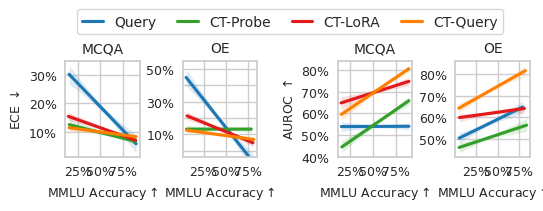

In [ ]:
palette = sns.color_palette("Paired",8)[1::2]

fig, axs = plt.subplots(
    1, 7, 
    figsize=(6, 1.25),
    gridspec_kw={
        'width_ratios': [1, 0.1, 1,  0.6, 1, 0.1, 1],
        #space between plots
        'wspace': 0.35,
        # 'hspace': 0.1,
    },
    constrained_layout=True
)

_mcqa_df = mcqa_df#.groupby(["model", "style"]).mean().reset_index()
_oe_df = oe_df#.groupby(["model", "style"]).mean().reset_index()

for k, metric in enumerate(["unc_ece", "unc_auroc"]):
    ax1 = axs[4 * k]
    ax2 = axs[4 * k + 2]

    if metric == "unc_ece":
        styles = [
            # "Query",
            "Query-TS",
            # "Probe",
            "CT-Probe-TS",
            "CT-LoRA-TS",
            # "CT",
            "CT-Query-TS",
        ]
    else:
        styles = [
            # "Query",
            "Query",
            # "Probe",
            "CT-Probe",
            "CT-LoRA",
            # "CT",
            "CT-Query",
            # "VE 2S1G",
        ]

    for i, style in enumerate(styles):
        sns.regplot(
            ax=ax1,
            data=_mcqa_df[_mcqa_df['style'] == style],
            x="acc",
            y=metric,
            label=style,
            color=palette[i],
            scatter=False,
            truncate=True,
            # scatter_kws={'s': 1, 'alpha': 0.1},
            # ci=75
        )

        sns.regplot(
            ax=ax2,
            data=_oe_df[_oe_df['style'] == style],
            x="acc",
            y=metric,
            label=style,
            color=palette[i],
            scatter=False,
            truncate=True,
            # scatter_kws={'s': 1, 'alpha': 0.1},
        )

    if metric == "unc_ece":
        ax1.set_ylabel("ECE $\downarrow$", fontsize=9)
    else:
        ax1.set_ylabel("AUROC $\\uparrow$", fontsize=9)

    # #turn off y tick marks
    # axs[1].set_yticklabels([])
    ax2.set_ylabel("")
    # axs[1].set_yticks([])

    ax1.set_xlabel("MMLU Accuracy$\\uparrow$", fontsize=9)
    ax2.set_xlabel("MMLU Accuracy$\\uparrow$", fontsize=9)

    #turn x tick labels into percentage

    # axs[0].xaxis.set_major_locator(plt.MultipleLocator(0.05))
    vals = ax1.get_xticks()
    ax1.set_xticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=9)

    ax1.yaxis.set_major_locator(plt.MultipleLocator(0.1))
    vals = ax1.get_yticks()
    ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=9)

    # axs[0].set_xticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
    vals = ax2.get_xticks()
    ax2.set_xticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=9)

    if metric == "unc_ece":
        ax2.set_ylim((-0.04, 0.55))

    ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))
    vals = ax2.get_yticks()

    if metric == "unc_ece":
        ax2.set_yticklabels(
            ['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)], fontsize=9
        )
    else:
        ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=9)

    ax1.tick_params(pad=0)
    ax2.tick_params(pad=0)

    ax1.set_title("MCQA", fontsize=10)
    ax2.set_title("OE", fontsize=10)


ax = axs[1]
ax.axis('off')

ax = axs[3]
ax.axis('off')

ax = axs[5]
ax.axis('off')

handles, labels = ax2.get_legend_handles_labels()
labels = [l.replace("-TS","") for l in labels]

fig.legend(
    handles=handles,
    labels=labels,
    loc='upper center',
    ncol=4,
    fontsize=10,
    columnspacing=1.5,
    handlelength=1.5,
    bbox_to_anchor=(0.5, 1.35),
)

fig.tight_layout()
fig.savefig("acc_ece_scatter.pdf", bbox_inches="tight")

/tmp/ipykernel_3227155/1697409775.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _mcqa_df = mcqa_df.groupby(["model", "style"]).mean().reset_index()
/tmp/ipykernel_3227155/1697409775.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _oe_df = oe_df.groupby(["model", "style"]).mean().reset_index()
/tmp/ipykernel_3227155/1697409775.py:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order=mcqa_comb_df.groupby(["

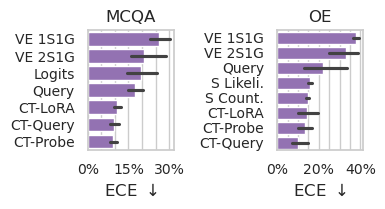

In [ ]:
sns.set_theme(style="whitegrid")

_mcqa_df = mcqa_df.groupby(["model", "style"]).mean().reset_index()

mcqa_ct_df = _mcqa_df[_mcqa_df['style'].str.contains("TS") & _mcqa_df['style'].str.contains("CT")]
mcqa_ve_df = _mcqa_df[_mcqa_df['style'].str.contains("VE")]
mcqa_query_df = _mcqa_df[_mcqa_df['style'].str.contains("Query-TS") & ~_mcqa_df['style'].str.contains("CT")]
mcqa_logits_df = _mcqa_df[_mcqa_df['style'] == "Logits-TS"]
mcqa_comb_df = pd.concat([mcqa_ct_df, mcqa_ve_df, mcqa_logits_df, mcqa_query_df])

mcqa_comb_df = mcqa_comb_df[mcqa_comb_df['style'] != "CT-Query-Probe-TS"]

_oe_df = oe_df.groupby(["model", "style"]).mean().reset_index()
_oe_df["style"] = _oe_df["style"].apply(lambda x: x.replace("Samp. Likelihood", "S Likeli."))
_oe_df["style"] = _oe_df["style"].apply(lambda x: x.replace("Samp. Counting", "S Count."))

oe_ts_df = _oe_df[_oe_df['style'].str.contains("TS") & _oe_df['style'].str.contains("CT")]
oe_no_ct_df = _oe_df[~_oe_df['style'].str.contains("CT") & ~_oe_df['style'].str.contains("Query")]
oe_query_df = _oe_df[_oe_df['style'].str.contains("Query-TS") & ~_oe_df['style'].str.contains("CT")]
oe_comb_df = pd.concat([oe_ts_df, oe_no_ct_df, oe_query_df])

oe_comb_df = oe_comb_df[oe_comb_df['style'] != "CT-Query-Probe-TS"]

fig, axs = plt.subplots(
    1, 2, 
    figsize=(4, 2.25),
    # gridspec_kw={
    #     'width_ratios': [7, 3],
    # }
    constrained_layout=True
)

sns.barplot(
    ax=axs[0],
    data=mcqa_comb_df,
    x="unc_ece",
    y="style",
    #sort by ece
    order=mcqa_comb_df.groupby(["style"]).mean().reset_index().sort_values("unc_ece", ascending=False)["style"],
    color=sns.color_palette("tab10",5)[4]
)

sns.barplot(
    ax=axs[1],
    data=oe_comb_df,
    y="style",
    x="unc_ece",
    #sort by ece
    order=oe_comb_df.groupby(["style"]).mean().reset_index().sort_values("unc_ece", ascending=False)["style"],
    color=sns.color_palette("tab10",5)[4]
)

axs[0].set_xlabel("ECE $\downarrow$")
axs[0].xaxis.set_major_locator(plt.MultipleLocator(0.05))
vals = axs[0].get_xticks()
axs[0].set_xticklabels(['{:,.0%}'.format(x) if i % 3 == 1 else '' for i, x in enumerate(vals)], fontsize=10)

vals = axs[0].get_yticklabels()
axs[0].set_yticklabels([v.get_text().replace("-TS","") for v in vals], fontsize=10)
axs[0].set_ylabel("")
axs[0].set_title("MCQA")

axs[1].set_xlabel("ECE $\downarrow$")
axs[1].xaxis.set_major_locator(plt.MultipleLocator(0.05))
vals = axs[1].get_xticks()
axs[1].set_xticklabels(['{:,.0%}'.format(x) if i % 4 == 1 else '' for i, x in enumerate(vals)], fontsize=10)

vals = axs[1].get_yticklabels()
axs[1].set_yticklabels([v.get_text().replace("-TS","") for v in vals], fontsize=10)
axs[1].set_ylabel("")
axs[1].set_title("OE")

# axs[0].set_ylim(0, 0.41)
# axs[1].set_ylim(0, 0.41)

fig.tight_layout()
fig.savefig("agg_oe_bars.pdf", bbox_inches="tight")

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../df_combined.csv")

df['query_P'] = df['query_P'].apply(lambda x: float(x[1:-1]))
df['default_P'] = df['default_P'].apply(lambda x: float(x[1:-1]))
df['query_correctness'] = df['query_correctness'].apply(lambda x: int(x[1:-1]))
df['default_correctness'] = df['default_correctness'].apply(lambda x: int(x[1:-1]))

query_T = np.exp(0.9021)
ct_T = np.exp(0.3555)

# df['query_log_odds_ratio'] = np.log(1 - x / x) 

def log_odds_ratio(x):
    return np.log(x / (1 - x))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


df['query_P_TS'] = df['query_P'].apply(lambda x: sigmoid(log_odds_ratio(x) / ct_T))
df['default_P_TS'] = df['default_P'].apply(lambda x: sigmoid(log_odds_ratio(x) / query_T))

Query AUROC: 0.7293212872748744
CT AUROC: 0.7830292294065546


/tmp/ipykernel_1152696/1805498896.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
/tmp/ipykernel_1152696/1805498896.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(x)}' if i % 2 == 0 else '' for i, x in enumerate(vals)])
/tmp/ipykernel_1152696/1805498896.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


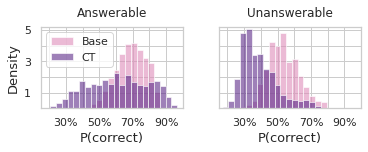

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(
    1, 2, 
    figsize=(5, 2),
    #increase horizontal space between plots
    gridspec_kw={
        'width_ratios': [1, 1],
        'wspace': 0.2,
    },
    sharey=True,
    constrained_layout=True
)

ambiguous_df = df[(df['ambiguous'] == True) & (df['query_correctness'] == False)] #df[df['ambiguous'] == True]
unambiguous_df = df[(df['ambiguous'] == False)]# & (df['query_correctness'] == True)] #df[df['ambiguous'] == False]

_df = pd.concat([ambiguous_df, unambiguous_df])
query_auroc = roc_auc_score(np.array(_df['query_correctness'].values, dtype=int), _df['default_P_TS'].values)
ct_auroc = roc_auc_score(np.array(_df['query_correctness'].values, dtype=int), _df['query_P_TS'].values)

print(f"Query AUROC: {query_auroc}")
print(f"CT AUROC: {ct_auroc}")

bins = np.linspace(0, 1, 30)

ax = axs[0]
ax.hist(unambiguous_df['default_P_TS'], bins=bins, alpha=0.6, label='Base', density=True, color=color_map['Query'])
ax.hist(unambiguous_df['query_P_TS'], bins=bins, alpha=0.6, label='CT', density=True, color=color_map['CT-Query'])
ax.set_xlabel("P(correct)",fontsize=13)
ax.set_ylabel("Density",fontsize=13)
ax.set_title("Answerable",pad=10)
ax.set_xlim((0.15,1))
ax.set_ylim((0, 5.2))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
# ax.text(0.4, 150, f"AUROC: {ct_auroc:.2f}")
ax.legend(fontsize=11)

ax = axs[1]
ax.hist(ambiguous_df['default_P_TS'], bins=bins, alpha=0.6, label='Base', density=True, color=color_map['Query'])
ax.hist(ambiguous_df['query_P_TS'], bins=bins, alpha=0.6, label='CT', density=True, color=color_map['CT-Query'])
ax.set_xlabel("P(correct)",fontsize=13)
ax.set_title("Unanswerable",pad=10)
ax.set_xlim((0.15,1))
ax.set_ylim((0, 5.2))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
vals = ax.get_yticks()
ax.set_yticklabels([f'{int(x)}' if i % 2 == 0 else '' for i, x in enumerate(vals)])
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
# ax.text(0.2, 150, f"AUROC: {query_auroc:.2f}")
# ax.legend()

fig.savefig("unanswerable_questions_hist.pdf", bbox_inches="tight")
plt.show()


In [119]:
import torch

def calibration(y, class_pred, conf, num_bins=10):
    """Compute the calibration.

    References:
    https://arxiv.org/abs/1706.04599
    https://arxiv.org/abs/1807.00263

    Args:
      y: one-hot encoding of the true classes, size (?, num_classes)
      p_mean: numpy array, size (?, num_classes)
             containing the mean output predicted probabilities
      num_bins: number of bins

    Returns:
      ece: Expected Calibration Error
      mce: Maximum Calibration Error
    """
    if isinstance(y, torch.Tensor):
        y = y.cpu().numpy()
        class_pred = class_pred.cpu().numpy()
        conf = conf.cpu().numpy()
    # Compute for every test sample x, the predicted class.
    # class_pred = np.argmax(p_mean, axis=1)
    # and the confidence (probability) associated with it.
    # conf = np.max(p_mean, axis=1)
    # Convert y from one-hot encoding to the number of the class
    # y = np.argmax(y, axis=1)
    # Storage
    acc_tab = np.zeros(num_bins)  # empirical (true) confidence
    mean_conf = np.zeros(num_bins)  # predicted confidence
    nb_items_bin = np.zeros(num_bins)  # number of items in the bins
    tau_tab = np.linspace(0, 1, num_bins + 1)  # confidence bins
    for i in np.arange(num_bins):  # iterate over the bins
        # select the items where the predicted max probability falls in the bin
        # [tau_tab[i], tau_tab[i + 1)]
        sec = (tau_tab[i + 1] > conf) & (conf >= tau_tab[i])
        nb_items_bin[i] = np.sum(sec)  # Number of items in the bin
        # select the predicted classes, and the true classes
        class_pred_sec, y_sec = class_pred[sec], y[sec]

        # average of the predicted max probabilities
        mean_conf[i] = np.mean(conf[sec]) if nb_items_bin[i] > 0 else np.nan
        # compute the empirical confidence
        acc_tab[i] = np.mean(class_pred_sec == y_sec) if nb_items_bin[i] > 0 else np.nan

    # Cleaning
    mean_conf = mean_conf[nb_items_bin > 0]
    acc_tab = acc_tab[nb_items_bin > 0]
    nb_items_bin = nb_items_bin[nb_items_bin > 0]

    if len(nb_items_bin) == 0:
        logging.warning("ECE computation failed.")
        return float("nan"), float("nan")

    # Expected Calibration Error
    ece = np.average(
        np.absolute(mean_conf - acc_tab),
        weights=nb_items_bin.astype(float) / np.sum(nb_items_bin),
    )
    # Maximum Calibration Error
    mce = np.max(np.absolute(mean_conf - acc_tab))
    return ece, mce

In [120]:
_df = df[df['ambiguous'] == False]
labels = np.zeros((_df.shape[0], 2))
correctness = _df['query_correctness'].values
labels[np.arange(_df.shape[0]), correctness] = 1

for x in ['default_P_TS', 'query_P_TS']:
    p_correct = np.concatenate([
        1 - _df[x].values[:,None],
       _df[x].values[:,None]
    ], axis=1)
    pred = p_correct.argmax(-1)

    ece = calibration(
        labels, 
        pred[:,None],
        p_correct[torch.arange(p_correct.shape[0]), pred],
        num_bins=20
    )[0]

    print(ece)


0.19169958964283274
0.17278259931845144


In [26]:
all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-ct-ts-scale/*/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model"] = model_name
    df["style"] = fn.split("/")[-2]
    all_dfs.append(df)

df = pd.concat(all_dfs)

df["dataset"] = df["dataset"].apply(lambda x: x.split(":")[-1])
df = df[df["split"] == "test"]

model_name_map = {
    "llama2_7b": "LLaMA-2\n7B",
    "llama2_7b_chat": "LLaMA-2\n7B Chat",
    "llama2_13b": "LLaMA-2\n13B",
    "llama2_13b_chat": "LLaMA-2\n13B Chat",
    "mistral_7b": "Mistral\n7B",
    "mistral_7b_instruct": "Mistral\n7B Instruct",
}

df["model"] = df["model"].apply(lambda x: model_name_map[x])

#aggregate by model name
data_scale_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()

/tmp/ipykernel_3736802/947686508.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_scale_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()


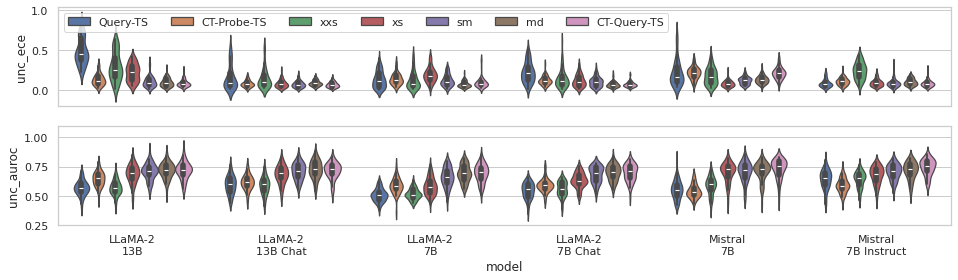

In [43]:

sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(2, 1, figsize=(16, 4), sharex=True)

sns.violinplot(
    ax=axs[0],
    data=pd.concat([oe_df, data_scale_df]),#oe_df[(oe_df['model'] == 'LLaMA-2\n7B') | (oe_df['model'] == 'Mistral\n7B')],
    hue="style",
    hue_order=["Query-TS", "CT-Probe-TS","xxs","xs","sm","md","CT-Query-TS"],#,"Query-Cross","CT-Probe-Cross","CT-Query-Cross"],
    x="model",
    y="unc_ece",
    density_norm='count',
    gap=0.2,
    # hue_order=order,
)

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=labels, loc='upper left', ncol=7)

sns.violinplot(
    ax=axs[1],
    data=pd.concat([data_scale_df, discr_oe]),
    hue="style",
    hue_order=["Query", "CT-Probe","xxs","xs","sm","md","CT-Query"],
    # hue_order= ["Query", "CT-Probe", "CT-LoRA", "CT-Query", "sBERT", "OAIEmb","Query-Cross","CT-Probe-Cross","CT-Query-Cross"],
    # hue_order= ["Query", "CT-Probe", "CT-Query", "Query-Cross","CT-Probe-Cross","CT-Query-Cross"],
    # hue_order=["Query", "CT-Probe", "CT-LoRA", "CT-Query","VE 1S1G", "VE 2S1G", "Samp. Counting", "Samp. Likelihood"],
    x="model",
    y="unc_auroc",
    # hue_order=order,
)

axs[1].set_ylim((0.25, 1.1))
axs[1].get_legend().remove()